In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist     # images for 0-9 handwritten numbers
# from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG

In [2]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

# Load a MNIST Data

In [3]:
def data_summary(x_train, y_train, x_test, y_test):
    print(f"Train Image Shape: {x_train.shape}")
    print(f"Train Label Shape: {y_train.shape}")
    print(f"Test Image Shape: {x_test.shape}")
    print(f"Test Label Shape: {y_test.shape}")
    
    print(f"Train Label: {y_train}")
    print(f"Test Label: {y_test}")

In [4]:
# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#summarize the data
data_summary(x_train, y_train, x_test, y_test)

Train Image Shape: (60000, 28, 28)
Train Label Shape: (60000,)
Test Image Shape: (10000, 28, 28)
Test Label Shape: (10000,)
Train Label: [5 0 4 ... 5 6 8]
Test Label: [7 2 1 ... 4 5 6]


* img shape is 28*28
* 60000 images in the train data & 10000 images in the test data

# Pre-Process the Data

In [5]:
# Reshape the image data 2-D to 1-D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_train = x_train.astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
x_test = x_test.astype("float32") / 255

In [6]:
# Categorically encode Labels --> 10 classes so make 10 array
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
#summarize the modified data
data_summary(x_train, y_train, x_test, y_test)

Train Image Shape: (60000, 784)
Train Label Shape: (60000, 10)
Test Image Shape: (10000, 784)
Test Label Shape: (10000, 10)
Train Label: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test Label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Build a Sequential NN

In [8]:
model = Sequential()

model.add(Dense(512, activation="relu", input_shape=(x_train.shape[1],))) # input layer, 512 nodes, input_shape of image
model.add(Dropout(0.5)) # regularization method handel Overfitting prb
model.add(Dense(256, activation="relu")) # 1st hidden layer
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

C:\Users\Bhautik Gondaliaya\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model

In [9]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train Model

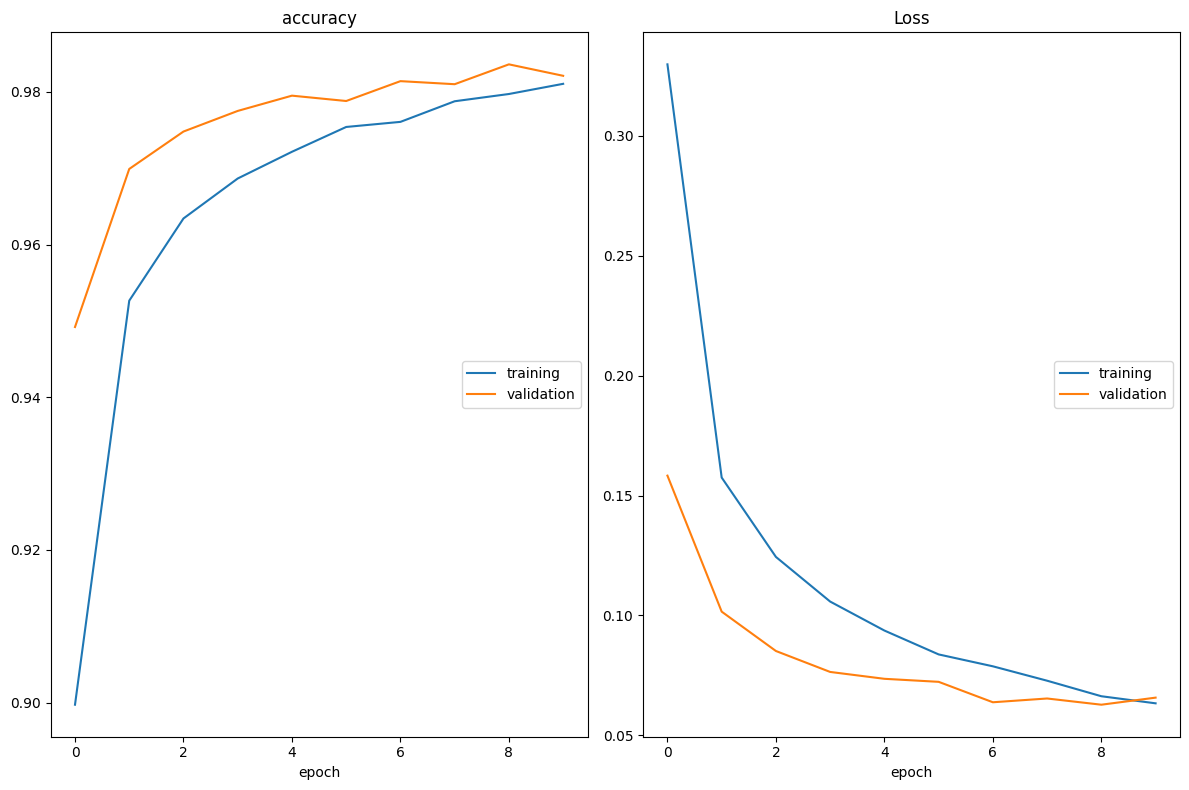

accuracy
	training         	 (min:    0.900, max:    0.981, cur:    0.981)
	validation       	 (min:    0.949, max:    0.984, cur:    0.982)
Loss
	training         	 (min:    0.063, max:    0.330, cur:    0.063)
	validation       	 (min:    0.063, max:    0.158, cur:    0.066)
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9822 - loss: 0.0592 - val_accuracy: 0.9821 - val_loss: 0.0657


In [10]:
model.fit(x_train, y_train,
         batch_size=128,
         epochs=10,
         callbacks=[plot_losses],
         verbose=1,
         validation_data=(x_test, y_test))

# Performance of NN

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {score[0]:0.5f} \nTest Accuracy: {score[1]*100:0.2f}%")

Test Loss: 0.06567 
Test Accuracy: 98.21%


# Summary of NN

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,638 (4.09 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 535,820 (2.04 MB)

# Output Network Visualization

In [13]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))